In [7]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [8]:
U,Sigma,Vt = svd(a)

print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('Vt matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
Vt matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [9]:
# 원본행렬로 복원
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [10]:
# 로우간 의존성이 있는 경우
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [12]:
U,Sigma,Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [13]:
# Sigma 값 중 2개가 0으로 변했다. 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미

In [15]:
# 원본 행렬로 복원

U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]

print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(U_,np.dot(Sigma_,Vt_))
print(np.round(a,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


### Truncated SVD

In [23]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print('원본행렬:\n',matrix)

U,Sigma,Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape,Sigma.shape,Vt.shape)
print('\nSigma값 행렬:',Sigma)

원본행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [32]:
# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components=4
U_tr,Sigma_tr,Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape,Sigma_tr.shape,Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:',Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)


Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


##### full_matrices=False의 의미에 대한 저자의 답변
일반적으로 svd는 MxN 행렬을 MxM , MxN, NXN 으로 분해합니다. 

full_matrices=True이면 앞과 같이 분해하는 것이고 full_matrices=False이면 compact 한 형태로 svd를 수행합니다.

svd 가 full_matrices = True이면 차원분해, full_matrices=False이면 차원 축소로 생각하셔도 됩니다.

## 사이킷런 TruncatedSVD 클래스를 이용한 변환
사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U,Sigma,Vt 행렬을 반환하지는 않는다.

In [33]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

In [38]:
iris_tsvd

array([[ 5.91274714e+00,  2.30203322e+00],
       [ 5.57248242e+00,  1.97182599e+00],
       [ 5.44697714e+00,  2.09520636e+00],
       [ 5.43645948e+00,  1.87038151e+00],
       [ 5.87564494e+00,  2.32829018e+00],
       [ 6.47759822e+00,  2.32464996e+00],
       [ 5.51597520e+00,  2.07090423e+00],
       [ 5.85092859e+00,  2.14807482e+00],
       [ 5.15891972e+00,  1.77506408e+00],
       [ 5.64500117e+00,  1.99000106e+00],
       [ 6.26539771e+00,  2.42576813e+00],
       [ 5.75200785e+00,  2.02037338e+00],
       [ 5.48058085e+00,  1.97777558e+00],
       [ 4.95112411e+00,  2.04828749e+00],
       [ 6.52596417e+00,  2.91606081e+00],
       [ 6.79037199e+00,  2.82500759e+00],
       [ 6.27239468e+00,  2.60811578e+00],
       [ 5.92953789e+00,  2.26766614e+00],
       [ 6.64813130e+00,  2.38959506e+00],
       [ 6.09486463e+00,  2.36082303e+00],
       [ 6.25397363e+00,  2.12001187e+00],
       [ 6.07364677e+00,  2.27178150e+00],
       [ 5.36999813e+00,  2.49808604e+00],
       [ 6.

Text(0, 0.5, 'TruncatedSVD Component2')

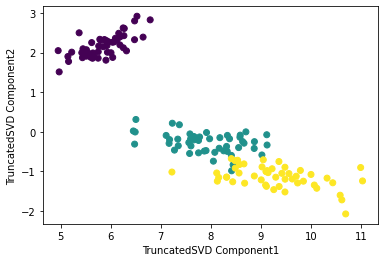

In [35]:
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component1')
plt.ylabel('TruncatedSVD Component2')

In [41]:
# 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환을 해 보자

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

Text(0.5, 1.0, 'PCA Transformed')

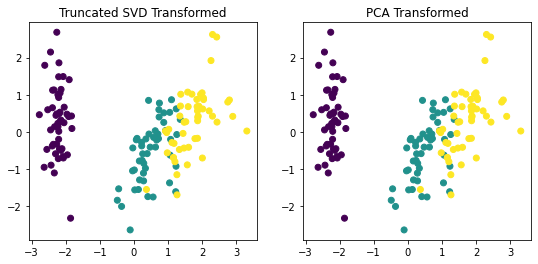

In [45]:
fig, (ax1,ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)

ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [51]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3293057297794443e-15
-8.543513119185775e-17


In [52]:
# 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다.
# 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다.
# 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미한다.

# 하지만 PCA는 밀집행렬에 대한 변환만 가능하며 SVD는 희소행렬에 대한 변환도 가능하다.

## 05 NMF(Non-Negative Matrix Factorization)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Component2')

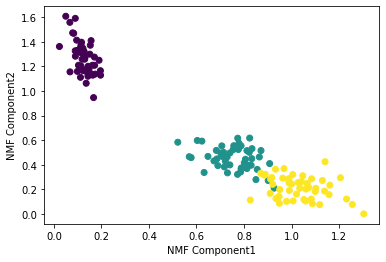

In [55]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component1')
plt.ylabel('NMF Component2')